reference : Dr Mark Albert's class slides
    
Create a series of decision rules which partition your data set appropriately for prediction
Optimal decision trees are actually quite difficult problems (NP-complete)
Greedy heuristics are used in practice
Use the rule which minimizes the mixing of classes (various techniques available)
After finding the best rule to split the data at one level, continue in a similar fashion for the rest
Advantages:
Simple to visualize and explain the algorithm for decision making
Fast heuristic approach
Disadvantage:
Performs poorly with large feature sets


decision trees can build complex decision boundaries by dividing the feature space
into rectangles. The more complex the decision boundary becomes it can easily result into
overfitting


In [1]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
x = iris.data[:,[2,3]]
y=iris.target
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1,stratify=y)
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc.fit(X_train)
X_train_sd = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [3]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt



def plot_decision_regions(X, y , classifier, test_idx =None, resolution=0.02):
    
    
    # setup marker colors map
    markers = ('s','x','o','^','v')
    colors = ('red','blue', 'lightgreen',' gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    
    x1_min, x1_max = X[:,0].min()-1 , X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1 , X[:,1].max()+1
    
    xx1 , xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x= X[y==cl, 0], y=X[y==cl,1], alpha =0.8, c = colors[idx],
                   marker = markers[idx], label=cl,
                   edgecolor='black')
    
    #highlight test samples
    
    if test_idx:
        
        X_test, y_test = X[test_idx,:],y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1], c = '',
                   marker = 'o', alpha=1 ,label='test_set',
                   edgecolor='black', linewidth=1)

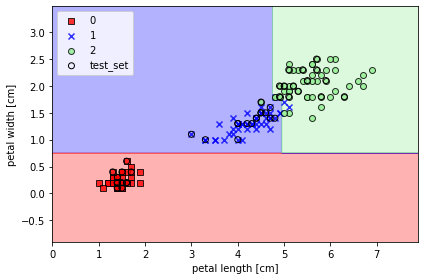

In [4]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, 
                              random_state=1)
tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

to show the trees in figures
install
pip install pydotplus
pip install graphviz
pip install pyparsing

In [ ]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=['Setosa', 
                                        'Versicolor',
                                        'Virginica'],
                           feature_names=['petal length', 
                                          'petal width'],
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png')